In [3]:
!pip install pytickersymbols
!pip install pandas_datareader 


In [34]:
import numpy as np
import pandas as pd
import matplotlib_inline
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10, 6)
import scipy.optimize
from pandas_datareader import data as web
import yfinance as yf
import statistics
# from pandas_datareader import data


In [5]:
def port_mean(R,W):
    return np.sum(R*W)

def port_var(W,C):
    return np.dot(np.dot(W,C), W)

In [6]:
from pytickersymbols import PyTickerSymbols
stock_data = PyTickerSymbols()
stocks_list = stock_data.get_dow_jones_nyc_yahoo_tickers()
stocks_list.remove('DOW')
len(stocks_list)


30

In [7]:
tickers = yf.Tickers(stocks_list)
market_cap = {}
for str in stocks_list:
    market_cap[str] = tickers.tickers[str].info['marketCap']
# market_cap

In [8]:
# Function loads historical stock prices of nine major S&P companies and returns them together
# with their market capitalizations
def load_data():
    symbols = stocks_list
    n = len(symbols)
    prices_out, caps_out = [], []
    for s in symbols:
        dataframe = pd.read_csv('dow-jones/%s.csv' % s, index_col=None, parse_dates=['date'])
        prices = list(dataframe['close'])[-2000:] # trailing window 500 days
        prices_out.append(prices)
        caps_out.append(market_cap[s])
    return symbols, prices_out, caps_out

names, prices, caps = load_data()
# print(prices)
prices = np.array(prices)

In [17]:
returns_portfolio = pd.DataFrame(prices).T
returns_portfolio.columns = names
returns_portfolio = returns_portfolio.pct_change()
returns_portfolio.head

<bound method NDFrame.head of            MMM       AXP      AAPL        BA       CAT       CVX      CSCO  \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1     0.001341 -0.009866  0.001062 -0.004085  0.004906  0.018999 -0.008508   
2    -0.003714 -0.010804 -0.035013 -0.011860 -0.071835 -0.005694 -0.038255   
3     0.001895 -0.008131  0.056533  0.054046  0.002004 -0.042028 -0.003346   
4     0.013359  0.003304  0.031134  0.058293 -0.000125 -0.006846  0.015293   
...        ...       ...       ...       ...       ...       ...       ...   
1995 -0.011925  0.011768 -0.002798  0.004303  0.009809  0.030916  0.003381   
1996  0.000666 -0.004285 -0.013878  0.001798  0.013632  0.012571  0.001053   
1997 -0.016054 -0.016258 -0.030685 -0.005385 -0.015464 -0.014753 -0.009678   
1998  0.019275  0.022985  0.028324  0.002813  0.003425  0.007572  0.009135   
1999 -0.005391  0.002919  0.002469  0.008364 -0.002664  0.006561  0.002947   

            KO     GS-PK        G

In [24]:
cov_mat = returns_portfolio.cov() * 252
cov_mat.shape

(30, 30)

In [54]:
portfolio = pd.DataFrame(prices).T
portfolio.columns = names

port_returns = []
port_volatility = []
port_weights =[] 

n = 30
num_portfolio = 10000

individual_returns = ((1 + np.mean(returns_portfolio, axis=0)) ** 252)-1
individual_returns.shape

(30,)

In [55]:
for port in range(num_portfolio):
    weights = np.random.random(n)
    weights = weights/np.sum(weights)
    port_weights.append(weights)

    returns = np.dot(weights.T, individual_returns)
    covariance = np.cov(individual_returns)*252
    port_returns.append(returns)

    var =  port_var(weights,covariance)

    sd = np.sqrt(var)
    annual_sd = sd*np.sqrt(250)
    port_volatility.append(annual_sd)



In [56]:
data = {'Returns': port_returns, 'Volatility': port_volatility}

for counter, symbol in enumerate(returns_portfolio.columns.to_list()):
    data[symbol+' weight'] = [w [counter] for w in port_weights]

portfolio = pd.DataFrame(data)
portfolio.head

<bound method NDFrame.head of        Returns  Volatility  MMM weight  AXP weight  AAPL weight  BA weight  \
0     0.119087    4.468297    0.015618    0.043974     0.009034   0.016645   
1     0.114512    4.391709    0.014119    0.027641     0.054113   0.037554   
2     0.097424    4.423105    0.013832    0.007645     0.010574   0.064171   
3     0.116753    4.308171    0.062506    0.022566     0.051768   0.053151   
4     0.121205    4.271553    0.040807    0.057575     0.050513   0.026319   
...        ...         ...         ...         ...          ...        ...   
9995  0.120722    4.310529    0.058402    0.045754     0.030008   0.009409   
9996  0.132377    4.271969    0.012490    0.053340     0.041924   0.030423   
9997  0.110249    4.296221    0.012977    0.052841     0.011949   0.008580   
9998  0.109792    4.355406    0.058700    0.015040     0.046244   0.039812   
9999  0.112869    4.646514    0.002356    0.001883     0.006544   0.010306   

      CAT weight  CVX weight  CSC

Text(0, 0.5, 'Expected Returns')

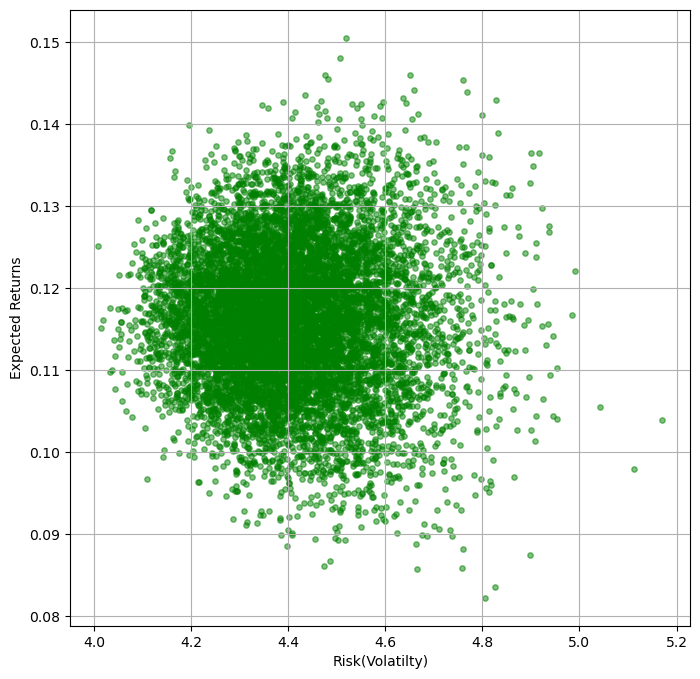

In [57]:
portfolio.plot.scatter(x='Volatility', y='Returns', marker='o', color='g', s=15, alpha=0.5, grid=True, figsize=[8,8])
plt.xlabel('Risk(Volatilty)')
plt.ylabel('Expected Returns')


In [58]:
min_vol_port = portfolio.iloc[portfolio['Volatility'].idxmin()]
min_vol_port

Returns         0.125157
Volatility      4.009043
MMM weight      0.000052
AXP weight      0.047781
AAPL weight     0.042914
BA weight       0.030602
CAT weight      0.037099
CVX weight      0.029695
CSCO weight     0.043757
KO weight       0.041632
GS-PK weight    0.044215
GS weight       0.036298
HD weight       0.020450
IBM weight      0.028841
INTC weight     0.022896
JNJ weight      0.021260
JPM weight      0.037900
MCD weight      0.047457
NKE weight      0.032243
MRK weight      0.046567
MSFT weight     0.038372
PG weight       0.020726
TRV weight      0.041262
UNH weight      0.040687
VZ weight       0.032276
V weight        0.031340
WMT weight      0.031017
WBA weight      0.035974
DIS weight      0.023761
AMGN weight     0.020501
HON weight      0.046348
CRM weight      0.026078
Name: 7906, dtype: float64

In [60]:
rf = 0.035
tan_port = portfolio.iloc[((portfolio['Returns']-rf)/portfolio['Volatility']).idxmax()]

Text(0, 0.5, 'Expected Returns')

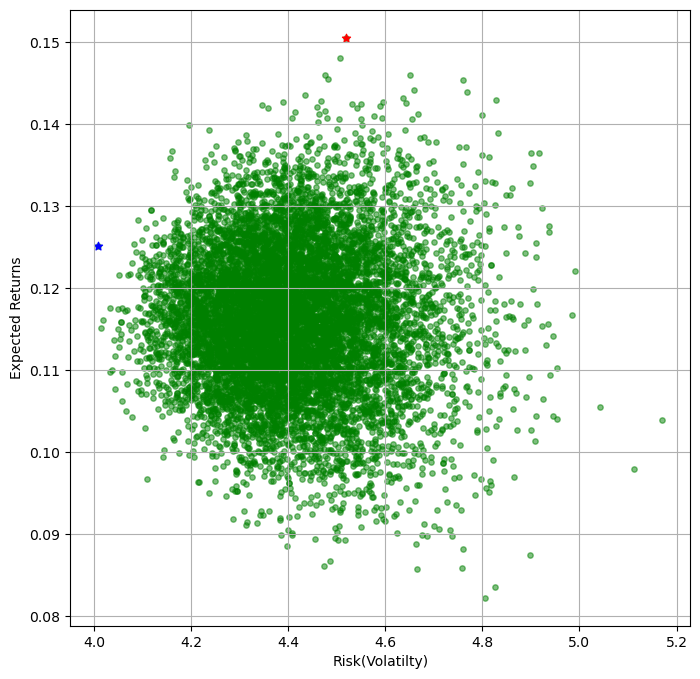

In [61]:
portfolio.plot.scatter(x='Volatility', y='Returns', marker='o', color='g', s=15, alpha=0.5, grid=True, figsize=[8,8])
plt.scatter(min_vol_port[1], min_vol_port[0], color='b', marker='*')
plt.scatter(tan_port[1], tan_port[0], color='r', marker='*')
plt.xlabel('Risk(Volatilty)')
plt.ylabel('Expected Returns')
